In [ ]:
#画像の読み込み
#画像グレースケール
#エッジ検出←白黒反転(+255)
#画像の重ね合わせ
#交点をの座標をだす
#交点と交点の間の領域
#領域の中の白が黒が多いかの割合を求める

In [ ]:
import cv2
im_gray = cv2.imread('/content/sample_data/00010_0.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
cv2.imwrite('/content/sample_data/00010_0.jpg', im_gray)

True

In [ ]:
pip install opencv-python

In [ ]:
im_edges = cv2.Canny(im_gray, 130, 285, L2gradient=True)
cv2.imwrite("edges.jpg", im_edges)

True

In [ ]:
im_inverted = cv2.bitwise_not(im_edges)

# 白黒反転した画像を保存
cv2.imwrite('edges_inverted.jpg', im_inverted)

True

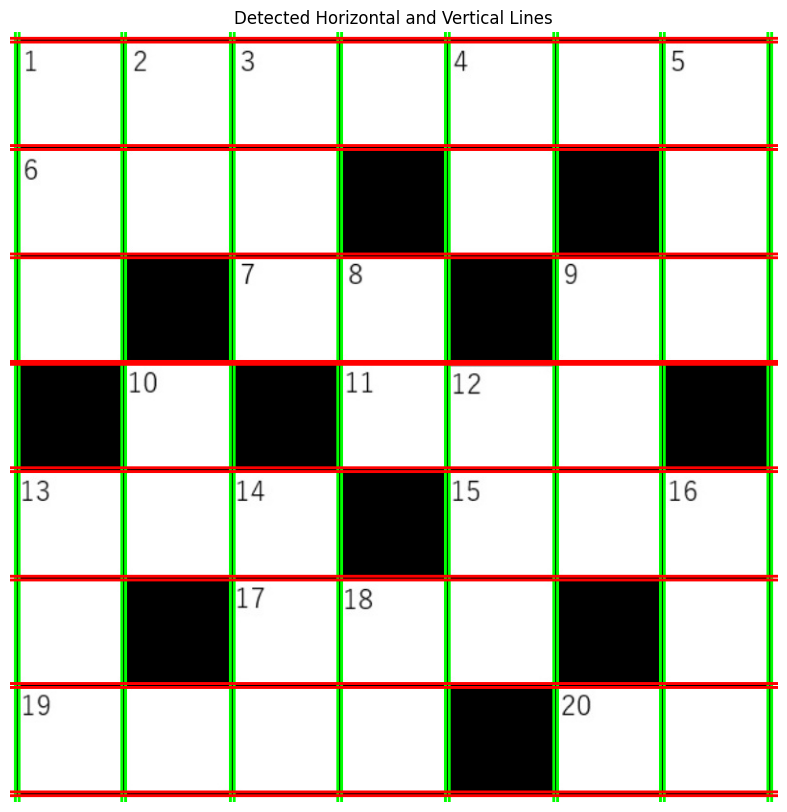

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Hough変換で直線を検出
lines = cv2.HoughLines(im_edges, 1, np.pi / 180, 150)

# 画像に直線を描画するためのカラー画像を作成
im_with_lines = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)

# 検出した直線を保持するリスト
horizontal_lines = []
vertical_lines = []

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # 直線の角度を度数法に変換
        angle = np.rad2deg(theta)

        # 水平な直線の角度の範囲を指定（±10度）
        if abs(angle - 0) < 10 or abs(angle - 180) < 10:
            horizontal_lines.append((rho, theta))
        # 垂直な直線の角度の範囲を指定（±10度）
        elif abs(angle - 90) < 10 or abs(angle - 270) < 10:
            vertical_lines.append((rho, theta))

# 水平な直線を描画（緑色）
for rho, theta in horizontal_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(im_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 垂直な直線を描画（赤色）
for rho, theta in vertical_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(im_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 結果を保存
cv2.imwrite('detected_lines.jpg', im_with_lines)

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Horizontal and Vertical Lines')
plt.axis('off')
plt.show()


In [ ]:
lines

array([[[  5.       ,   0.       ]],

       [[793.       ,   0.       ]],

       [[796.       ,   1.5707964]],

       [[  6.       ,   1.5707964]],

       [[ 10.       ,   1.5707964]],

       [[118.       ,   1.5707964]],

       [[  9.       ,   0.       ]],

       [[116.       ,   0.       ]],

       [[341.       ,   0.       ]],

       [[789.       ,   0.       ]],

       [[567.       ,   1.5707964]],

       [[683.       ,   1.5707964]],

       [[792.       ,   1.5707964]],

       [[458.       ,   1.5707964]],

       [[681.       ,   0.       ]],

       [[233.       ,   0.       ]],

       [[229.       ,   0.       ]],

       [[457.       ,   0.       ]],

       [[570.       ,   0.       ]],

       [[677.       ,   0.       ]],

       [[122.       ,   1.5707964]],

       [[345.       ,   0.       ]],

       [[235.       ,   1.5707964]],

       [[679.       ,   1.5707964]],

       [[231.       ,   1.5707964]],

       [[571.       ,   1.5707964]],

       [[120

Detected intersections:
(233, 683)
(341, 567)
(233, 567)
(457, 235)
(116, 235)
(116, 6)
(570, 118)
(793, 343)
(457, 6)
(341, 118)
(233, 118)
(457, 796)
(116, 796)
(116, 683)
(681, 458)
(116, 567)
(457, 683)
(457, 567)
(681, 235)
(5, 458)
(681, 6)
(570, 343)
(5, 235)
(793, 458)
(116, 118)
(5, 6)
(341, 343)
(233, 343)
(457, 118)
(681, 796)
(681, 683)
(681, 567)
(793, 235)
(5, 796)
(5, 683)
(793, 6)
(5, 567)
(793, 796)
(793, 683)
(116, 343)
(681, 118)
(793, 567)
(457, 343)
(570, 458)
(5, 118)
(341, 458)
(233, 458)
(570, 235)
(341, 235)
(570, 567)
(233, 235)
(341, 6)
(570, 6)
(793, 118)
(570, 683)
(570, 796)
(457, 458)
(681, 343)
(233, 6)
(341, 796)
(116, 458)
(233, 796)
(5, 343)
(341, 683)
64


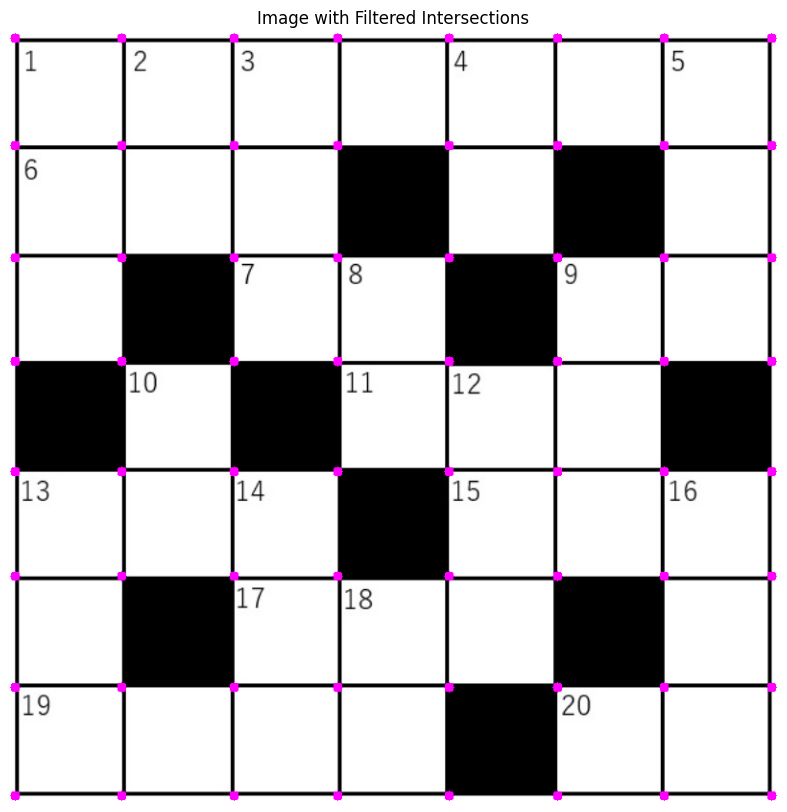

In [ ]:
# 交点の座標を保持するリスト
intersections = []

# 水平な直線と垂直な直線の組み合わせで交点を計算
for (rho_h, theta_h) in horizontal_lines:
    for (rho_v, theta_v) in vertical_lines:
        A = np.array([
            [np.cos(theta_h), np.sin(theta_h)],
            [np.cos(theta_v), np.sin(theta_v)]
        ])
        b = np.array([rho_h, rho_v])
        # 行列Aが逆行列を持つかを確認
        if np.linalg.det(A) != 0:
            # 交点の座標を計算
            intersection = np.linalg.solve(A, b)
              # 重複を避けるため、既存の交点との距離を計算して比較
            is_unique = True
            for existing_point in intersections:
                distance = np.sqrt((intersection[0] - existing_point[0])**2 + (intersection[1] - existing_point[1])**2)
                if distance < 30:
                    is_unique = False
                    break

            # 一定距離以上離れている場合にのみ交点として追加
            if is_unique:
                intersections.append((int(intersection[0]), int(intersection[1])))

# 重複を除去した交点の座標リストを表示
print("Detected intersections:")
unique_intersections = list(set(intersections))  # 重複を除去
for point in unique_intersections:
    print(point)

print(len(unique_intersections))

# 画像に交点を描画して保存および表示
im_with_intersections = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)

for point in unique_intersections:
    cv2.circle(im_with_intersections, point, 5, (255, 0, 255), -1)  # 紫色で交点を描画

# 結果を保存
cv2.imwrite('image_with_intersections_filtered.jpg', im_with_intersections)

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im_with_intersections, cv2.COLOR_BGR2RGB))
plt.title('Image with Filtered Intersections')
plt.axis('off')
plt.show()

In [ ]:
sorted_unique_intersections=sorted(unique_intersections)
for point in sorted_unique_intersections:
    print(point)

(5, 6)
(5, 118)
(5, 235)
(5, 343)
(5, 458)
(5, 567)
(5, 683)
(5, 796)
(116, 6)
(116, 118)
(116, 235)
(116, 343)
(116, 458)
(116, 567)
(116, 683)
(116, 796)
(233, 6)
(233, 118)
(233, 235)
(233, 343)
(233, 458)
(233, 567)
(233, 683)
(233, 796)
(341, 6)
(341, 118)
(341, 235)
(341, 343)
(341, 458)
(341, 567)
(341, 683)
(341, 796)
(457, 6)
(457, 118)
(457, 235)
(457, 343)
(457, 458)
(457, 567)
(457, 683)
(457, 796)
(570, 6)
(570, 118)
(570, 235)
(570, 343)
(570, 458)
(570, 567)
(570, 683)
(570, 796)
(681, 6)
(681, 118)
(681, 235)
(681, 343)
(681, 458)
(681, 567)
(681, 683)
(681, 796)
(793, 6)
(793, 118)
(793, 235)
(793, 343)
(793, 458)
(793, 567)
(793, 683)
(793, 796)


In [ ]:
intersections_yray = list(set(point[0] for point in sorted_unique_intersections))
intersections_yray.sort()
print("Unique yray:", intersections_yray)
# 出力: Unique left numbers: [5, 116, 233, 341, 457, 570, 681, 793]

# 右の数字（1番目の要素）の重複なしリストを作成
intersections_xray = list(set(point[1] for point in sorted_unique_intersections))
intersections_xray.sort()
print("Unique xray:", intersections_xray)

Unique yray: [5, 116, 233, 341, 457, 570, 681, 793]
Unique xray: [6, 118, 235, 343, 458, 567, 683, 796]


In [ ]:
array_board=np.empty((len(intersections_yray)-1,len(intersections_xray)-1),dtype=str)
for i in range(len(intersections_yray)-1):
  for j in range(len(intersections_xray)-1):
    pixel_value=0
    pixel_count=0
    for y in range(intersections_yray[i],intersections_yray[i+1]):
      for x in range(intersections_xray[j],intersections_xray[j+1]):
        # Check if the pixel index is within the image bounds
        if y < im_gray.shape[0] and x < im_gray.shape[1]:
            pixel_value = pixel_value+im_gray[y, x]
            pixel_count=pixel_count+1
    avg_pixel=pixel_value/pixel_count
    threshold=127
    if avg_pixel>threshold:
      array_board[i,j]="□"
    else:
      array_board[i,j]="■"
for row in array_board:
    print(''.join(row))


□□□□□□□
□□□■□■□
□■□□■□□
■□■□□□■
□□□■□□□
□■□□□■□
□□□□■□□
